In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Natural Language Processing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
from google.colab import files
uploaded = files.upload()


Saving Restaurant_Reviews.tsv to Restaurant_Reviews.tsv


In [4]:
input=list(uploaded.keys())
print(input)
input=input[0]
print(input)

['Restaurant_Reviews.tsv']
Restaurant_Reviews.tsv


In [5]:
#  read the CSV file and look at the first five rows of the data:

dataset = pd.read_csv(input, delimiter="\t", quoting=3)
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
input=list(uploaded.keys())
print(input)
input=input[0]
print(input)


['Restaurant_Reviews.tsv']
Restaurant_Reviews.tsv


In [7]:
extension= input.split(".")
print(extension[1])

tsv


In [8]:
dataset.shape

(1000, 2)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [10]:
#Data types of Columns
types = dataset.dtypes
print(types)

Review    object
Liked      int64
dtype: object


In [11]:
#Count total number of classes in Data
class_counts = dataset.groupby('Liked').size()
print(class_counts)

Liked
0    500
1    500
dtype: int64


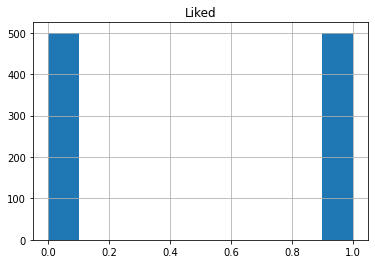

In [12]:
# Histogram plot
from matplotlib import pyplot
dataset.hist()
pyplot.show()


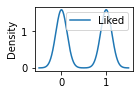

In [13]:
#Density Plot
dataset.plot(kind='density' ,subplots=True, layout=(3,3), sharex=False)
pyplot.show()

In [14]:
#Finding missing values
dataset.isnull().sum()

Review    0
Liked     0
dtype: int64

In [15]:
# Removing index column
dataset = dataset.dropna()
#removes the nan values

In [16]:
print(dataset.loc[0][0])


Wow... Loved this place.


In [17]:
# Let us take text to understand process of data preprocessing in NLP
text="Wow... Loved this place."

In [18]:
# First step: cleaning Text and removing number and punctuation marks.
import re
review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][0])
print(text)
print('-------------------------------------------------')
print('Review after removing number and punctuation marks. ')
print(review)


Wow... Loved this place.
-------------------------------------------------
Review after removing number and punctuation marks. 
Wow    Loved this place 


In [19]:
# Second  step: converting text into lower case.
review=review.lower()
print(text)
print('-------------------------------------------------')
print('Text after convering into lower case')
print(review)

Wow... Loved this place.
-------------------------------------------------
Text after convering into lower case
wow    loved this place 


In [20]:
# Third step: Removing stop words like 'this, the'
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
review = review.split()
print(review)

['wow', 'loved', 'this', 'place']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
# Third step: Removing stop words like 'this, the'
# set function is generally used for long article to fasten process
review1 = [word for word in review if not word in set(stopwords.words('english'))]
print('Text after removing stop words')
print(review1)


Text after removing stop words
['wow', 'loved', 'place']


In [22]:
# Fourth step: converting stemming words
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
review = [ps.stem(word) for word in review1 if not word in set(stopwords.words('english'))]
print('After converting stemmer words')
print(review)


After converting stemmer words
['wow', 'love', 'place']


In [23]:
#joining these words of list
review2 = ' '.join(review)


In [24]:
# Creating the Bag of Words model
corpus1 = []
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
print(review2)
corpus1.append(review2)
print(corpus1)
X = cv.fit_transform(corpus1).toarray()
print(X)

wow love place
['wow love place']
[[1 1 1]]


In [25]:
# Cleaning the texts for all review using for loop
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, dataset.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', dataset.iloc[:,0][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    print(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


wow love place
crust good
tasti textur nasti
stop late may bank holiday rick steve recommend love
select menu great price
get angri want damn pho
honeslti tast fresh
potato like rubber could tell made ahead time kept warmer
fri great
great touch
servic prompt
would go back
cashier care ever say still end wayyy overpr
tri cape cod ravoli chicken cranberri mmmm
disgust pretti sure human hair
shock sign indic cash
highli recommend
waitress littl slow servic
place worth time let alon vega
like
burritto blah
food amaz
servic also cute
could care less interior beauti
perform
right red velvet cake ohhh stuff good
never brought salad ask
hole wall great mexican street taco friendli staff
took hour get food tabl restaur food luke warm sever run around like total overwhelm
worst salmon sashimi
also combo like burger fri beer decent deal
like final blow
found place accid could happier
seem like good quick place grab bite familiar pub food favor look elsewher
overal like place lot
redeem qualiti r

In [26]:
print(corpus)

['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place worth time let alon vega', 'like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could happier', 'seem like go

In [27]:
#    Adding corpus to csv 
corpus_dataset = pd.DataFrame(corpus)
corpus_dataset['corpus'] = corpus_dataset
corpus_dataset = corpus_dataset.drop([0], axis = 1) 
corpus_dataset.to_csv('/content/drive/My Drive/corpus_dataset.csv')

In [28]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
print(cv)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values


CountVectorizer(max_features=1500)


In [29]:
print(X.shape)

(1000, 1500)


In [30]:
print(X.shape)
print(X)

(1000, 1500)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [32]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [33]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: ')
print(cm)

Confusion matrix: 
[[55 42]
 [12 91]]


In [35]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))


Accuracy: 73.00


In [36]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))


Precision: 68.421


In [37]:
from sklearn.metrics import f1_score
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))


F-Measure: 77.119


In [38]:
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))


Recall: 88.350


In [39]:
Review = "not very Good" #@param {type:"string"}
input_data = [Review] 
  
input_data = cv.transform(input_data).toarray()
print(input_data)

input_pred = classifier.predict(input_data)

input_pred = input_pred.astype(int)


if input_pred[0]==1:
    print("Review is Positive")
else:
    print("Review is Negative")

[[0 0 0 ... 0 0 0]]
Review is Positive


In [40]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(classifier,open('/content/drive/My Drive/restuarantreviewnlp.pkl', 'wb')) 
# Saving model to disk


[INFO] Saving model...


In [41]:
# Load the pickled model 
model = pickle.load(open('/content/drive/My Drive/restuarantreviewnlp.pkl','rb'))  
# Use the loaded pickled model to make predictions

In [42]:
!pip install streamlit==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
# Load the pickled model
import pickle
pickle_in = open("/content/drive/My Drive/restuarantreviewnlp.pkl","rb")
model=pickle.load(pickle_in)

In [57]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
st.set_option('deprecation.showfileUploaderEncoding', False)
# Load the pickled model
model = pickle.load(open('/content/drive/My Drive/restuarantreviewnlp.pkl','rb'))   


def review(text):
  dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter="\t", quoting=3)
  # First step: cleaning Text and removing number and punctuation marks.
  # Cleaning the texts for all review using for loop
  import re
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  from nltk.stem.porter import PorterStemmer
  corpus = []
  for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    #print(review)
    corpus.append(review)
  # Creating the Bag of Words model
  from sklearn.feature_extraction.text import CountVectorizer
  cv = CountVectorizer(max_features = 1500)
  #print(cv)
  X = cv.fit_transform(corpus).toarray()
  import re
  review = re.sub('[^a-zA-Z]', ' ', text)
  review=review.lower()
  print(review)
  # Third step: Removing stop words like 'this, the'
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  review = review.split()
  print(review)
  # Third step: Removing stop words like 'this, the'
   # set function is generally used for long article to fastem process
  review1 = [word for word in review if not word in set(stopwords.words('english'))]
  print(review1)
  # Fourth step: converting stemming words
  from nltk.stem.porter import PorterStemmer
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review1 if not word in set(stopwords.words('english'))]
  print(review)
  # joining these words of list
  review2 = ' '.join(review)
  print(review2)
  # Creating the Bag of Words model
  
  X = cv.transform(review).toarray()
  input_pred = model.predict(X)
  input_pred = input_pred.astype(int)
  print(input_pred)
  if input_pred[0]==1:
    result= "Review is Positive"
  else:
    result="Review is negative" 

 
    
  return result
html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">Department of Computer Engineering</p></center> 
   <center><p style="font-size:25px;color:white;margin-top:10px;"Summer Internship 2022</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)
st.header("Restaurant Review System ")
  
  
text = st.text_area("Writre Review of Restaurant")

if st.button("Review Analysis"):
  result=review(text)
  st.success('Model has predicted {}'.format(result))
      
if st.button("About"):
  st.subheader("Developed by A")
  st.subheader("Student, Department of Computer Engineering")
html_temp = """
   <div class="" style="background-color:orange;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:20px;color:white;margin-top:10px;">Summer Internship 2022 Project Deployment</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)





Overwriting app.py


In [45]:
!nohup streamlit run  app.py &


nohup: appending output to 'nohup.out'


In [46]:
!pip install pyngrok


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 4.4 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=3f2f767956cf422cd732954abfca063878506053ef978039e43da767b417ae12
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [47]:
!ngrok authtoken 2CT7dbroQFR2L8KAMXLmlz7FpIs_75Gu37FFUqRetvGgMkYGt

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [58]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://c49b-34-80-192-76.ngrok.io" -> "http://localhost:80">

In [ ]:
!streamlit run --server.port 80 app.py


2022-08-03 18:00:36.518 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://34.80.192.76:80

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
bla
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['bla']
['bla']
['bla']
bla
[1]
